In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
df2001 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')

In [2]:
df = pd.concat([df2000, df2001],  ignore_index=True)
df_ml = df.copy()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2400 non-null   object 
 1   adult                  2398 non-null   float64
 2   backdrop_path          1280 non-null   object 
 3   belongs_to_collection  222 non-null    object 
 4   budget                 2398 non-null   float64
 5   genres                 2398 non-null   object 
 6   homepage               134 non-null    object 
 7   id                     2398 non-null   float64
 8   original_language      2398 non-null   object 
 9   original_title         2398 non-null   object 
 10  overview               2354 non-null   object 
 11  popularity             2398 non-null   float64
 12  poster_path            2130 non-null   object 
 13  production_companies   2398 non-null   object 
 14  production_countries   2398 non-null   object 
 15  rele

In [3]:
# How do I delete the rows based on the condition revenue > 0 and budget > 0

<AxesSubplot:>

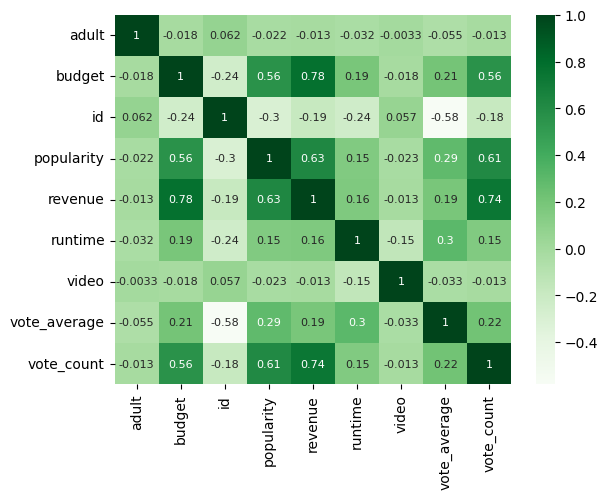

In [4]:
corr = df_ml.corr()
sns.heatmap(corr, cmap='Greens', annot=True, annot_kws={'size': 8})

Text(0.5, 1.0, 'Budget and Revenue per movie')

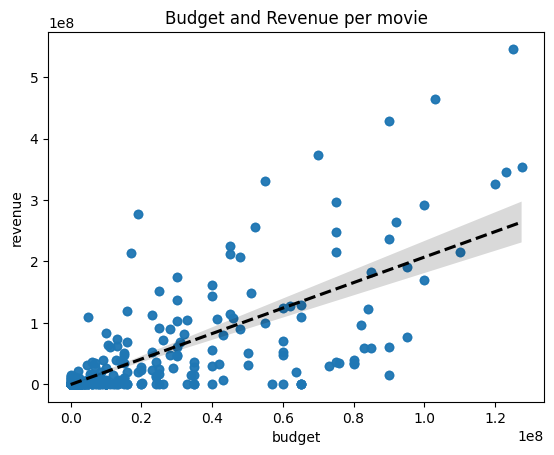

In [5]:
sns.regplot(data=df_ml, x='budget', y='revenue', line_kws={'color':'black', 'ls': '--'});
plt.title("Budget and Revenue per movie")

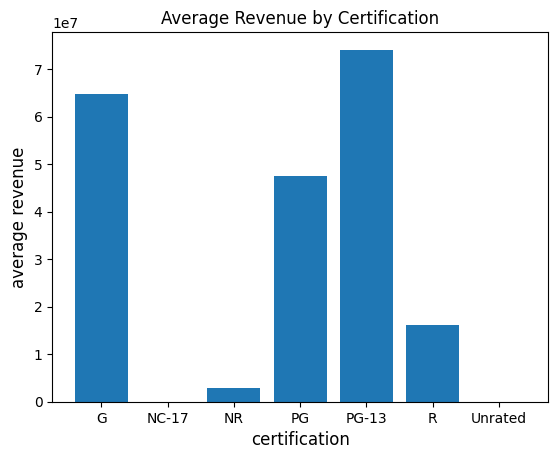

In [6]:
# What is the average revenue per certification category?
temp = df_ml.groupby('certification')['revenue'].mean()
plt.bar(temp.index, temp.values);
plt.ylabel('average revenue', fontsize=12)
plt.xlabel('certification', fontsize=12)
plt.title('Average Revenue by Certification');

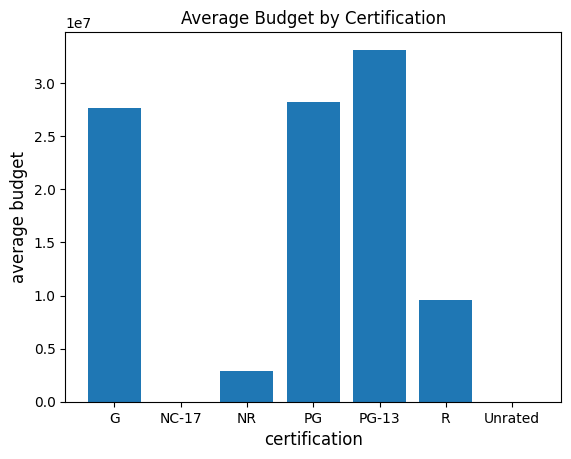

In [7]:
# What is the average budget per certification category?
temp = df_ml.groupby('certification')['budget'].mean()
plt.bar(temp.index, temp.values);
plt.ylabel('average budget', fontsize=12)
plt.xlabel('certification', fontsize=12)
plt.title('Average Budget by Certification');

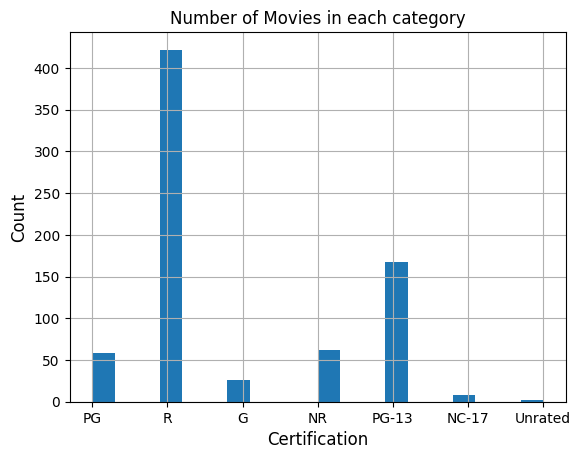

In [8]:
# How many movies are there in each of the certification categories (G/PG/PG-13/R)?
df_ml['certification'].hist(bins=20)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Certification', fontsize=12)
plt.title('Number of Movies in each category');

In [9]:
# Save current merged dataframe to a file.
df_ml.to_csv("Data/tmdb_results_combined.csv.gz", compression='gzip',index=False)
print('Done!')

Done!


"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}]"